# K Mean Clustering 

### Import the libraries

In [42]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display, HTML

### Sapmle Input Data vizualization

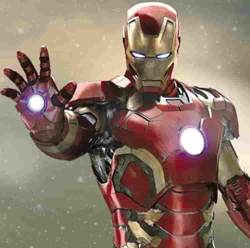

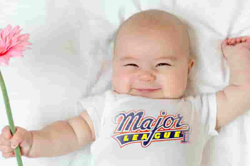

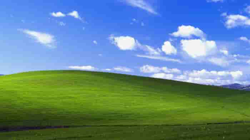

In [43]:
image_filenames = ['1.jpg', '2.jpg', '3.jpg']

# Open and display each image
for filename in image_filenames:
    # Open the image using PIL
    image = Image.open(filename)

    # Define the desired width for the resized image
    desired_width = 250

    # Calculate the new height while maintaining the aspect ratio
    aspect_ratio = float(image.size[1]) / float(image.size[0])
    desired_height = int(aspect_ratio * desired_width)

    # Resize the image
    resized_image = image.resize((desired_width, desired_height))

    # Display the resized image
    display(resized_image)


### Read the images

In [44]:
#________________This code is for getting information of images(No editing needed)_______________________



input_img_1_info = cv.imread('1.jpg')
input_img_2_info = cv.imread('2.jpg')
input_img_3_info = cv.imread('3.jpg')

#Converting BGR to RGB(OpenCV uses BGR format by default)__You can skip this step if you are using PIL to load images
input_img_1 = cv.cvtColor(input_img_1_info, cv.COLOR_BGR2RGB)
input_img_2 = cv.cvtColor(input_img_2_info, cv.COLOR_BGR2RGB)
input_img_3 = cv.cvtColor(input_img_3_info, cv.COLOR_BGR2RGB)


#______________RESIZE IMAGES HERE IF NEEDED_______________________
scaling_factor = 0.3  # Adjust this value to change the size of the shrunk images
#your code here depending on the library you are using

#______________RESIZE IMAGES HERE IF NEEDED_______________________

#Information of images
print("shapes of images:")
print('Image 1: ', input_img_1_info.shape)
print('Image 2: ', input_img_2_info.shape)
print('Image 3: ', input_img_3_info.shape)

#__________You can use PIL to load images which use RGB format by default_____________________
# BUT you wont be able to get information of images as given by cv2
 
#input_img_1 = Image.open('1.jpg')
#input_img_2 = Image.open('2.jpg')
#input_img_3 = Image.open('3.jpg')
#print("sizes of images:")
#print('Image 1: ', input_img_1.size)
#print('Image 2: ', input_img_2.size)
#print('Image 3: ', input_img_3.size)




shapes of images:
Image 1:  (744, 750, 3)
Image 2:  (533, 800, 3)
Image 3:  (393, 700, 3)


Expexted Output: <br>
shapes of images: <br>
Image 1:  (744, 750, 3) <br>
Image 2:  (533, 800, 3)<br>
Image 3:  (393, 700, 3)

### Understanding the data

In [45]:
#printing the first row of the image
print("Image 1 : ROW1:")
print(input_img_1_info[0].shape)
print(input_img_1_info[0])
type(input_img_1_info)

Image 1 : ROW1:
(750, 3)
[[145 167 178]
 [145 167 178]
 [145 167 178]
 ...
 [ 96 115  98]
 [ 96 115  98]
 [ 96 115  98]]


numpy.ndarray

### Preprocessing the data

In [46]:
#_____________You will need this piece of code if you are using PIL to load images_____________________
# Cuz Cv2 make use of numpy array to store images and PIL uses Image object to store images
input_img_1 = np.array(input_img_1)
print(f"input_img_1.shape: {input_img_1.shape}")
input_img_2 = np.array(input_img_2)
print(f"input_img_2.shape: {input_img_2.shape}")
input_img_3 = np.array(input_img_3)
print(f"input_img_3.shape: {input_img_3.shape}")



input_img_1.shape: (744, 750, 3)
input_img_2.shape: (533, 800, 3)
input_img_3.shape: (393, 700, 3)


In [47]:
#_________________This code will need your attention to run properly____________

#convert the image 1 to 2D array
input_img_1_2d = input_img_1.reshape((-1, input_img_1.shape[2]))
print("Image 1 : 2D array:")
print(input_img_1_2d.shape)

#convert the image 2 to 2D array
input_img_2_2d = input_img_2.reshape((-1, input_img_2.shape[2]))
print("Image 2 : 2D array:")
print(input_img_2_2d.shape)

#convert the image 3 to 2D array
input_img_3_2d = input_img_3.reshape((-1, input_img_3.shape[2]))
print("Image 3 : 2D array:")
print(input_img_3_2d.shape)

Image 1 : 2D array:
(558000, 3)
Image 2 : 2D array:
(426400, 3)
Image 3 : 2D array:
(275100, 3)


##### Expected Output

Image 1 : 2D array:
(558000, 3) <br>
Image 2 : 2D array:
(426400, 3) <br>
Image 3 : 2D array:
(275100, 3) <br>

### Implimentation of K-Mean Clustering

#### Helper Funtions

In [48]:
#your code here
def initialize_centroids(data, k):
    centroids_indices = np.random.choice(data.shape[0], size=k, replace=False)
    centroids = data[centroids_indices]
    return centroids

In [49]:
#your code here

def assign_points(data, centroids):
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    cluster_labels = np.argmin(distances, axis=0)
    return cluster_labels

In [50]:
#your code here
def update_centroids(data, cluster_labels, k):
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_points = data[cluster_labels == i]
        if cluster_points.shape[0] > 0:
            centroids[i] = np.mean(cluster_points, axis=0)
    return centroids

#### Mian Function

In [51]:
#_________________This code will need your attention to run properly____________
#your code here

def kmeans_clustering(data, k, max_iterations=100):   
    # Randomly initialize centroids
    #call the helper function here of random_centroids_initializer
    centroids = initialize_centroids(data, k)
    for _ in range(max_iterations):
        # Assign each data point to the nearest centroid
        #call the helper function here of assign_data_points_to_nearest_centroid
        cluster_labels = assign_points(data, centroids)
        # Update centroids by taking the mean of the assigned data points
        #call the helper function here of update_centroids_by_Manhattan_distance(absolute distance)
        updated_centroids = update_centroids(data, cluster_labels, k)
        # Check convergence
        if np.allclose(centroids, updated_centroids):
            break
        #Upadte centroids to the latest centroids
        centroids = updated_centroids
    return cluster_labels, centroids

#### Verification of the output

In [52]:
# chanage the value of  to match your output with given output
image = input_img_2_2d
k = 2
labels, centroids = kmeans_clustering(image, k)
print('k', k)
print('unique labels',np.unique(labels))
print('Labels shape: ', labels.shape)
print('Centroids shape: ', centroids.shape)
print('centroids',centroids)

k 2
unique labels [0 1]
Labels shape:  (426400,)
Centroids shape:  (2, 3)
centroids [[226.22651384 224.5644035  223.32050972]
 [196.66706061 164.34171488 148.18361257]]


#### Expected Output
Note : The output will vary if you use diffrent distance metric or reduced size of the image.

For input_image_1: <br>
<hr>

- k 2
- unique labels [0 1]
- Labels shape:  (558000,)
- Centroids shape:  (2, 3)
> [[ 98.15321625  72.44336854  63.15206393] <br>
      [182.32910336 168.23132632 150.00980018]]
<hr>

For input_image_2: <br>

- k 2
- unique labels [0 1]
- Labels shape:  (426400,)
- Centroids shape:  (2, 3)
> centroids [[226.34647018 223.46249381 220.90380275] <br>
 [193.99718075 161.61216588 146.87529588]]

 <hr>
 For input_image_1: <br>

- k 2
- unique labels [0 1]
- Labels shape:  (275100,)
- Centroids shape:  (2, 3)
> centroids [[118.32229891 158.51120919 238.83084683] <br>
      [ 79.00552162 107.03481755  28.29886674]]

## BATCH RUN

### K-Mean Clustering on the all images

NOTE: IF YOUR CODE IS TAKING TOO MUCH TIME TO RUN, TRY RESIZE THE IMAGE TO SMALLER SIZE 

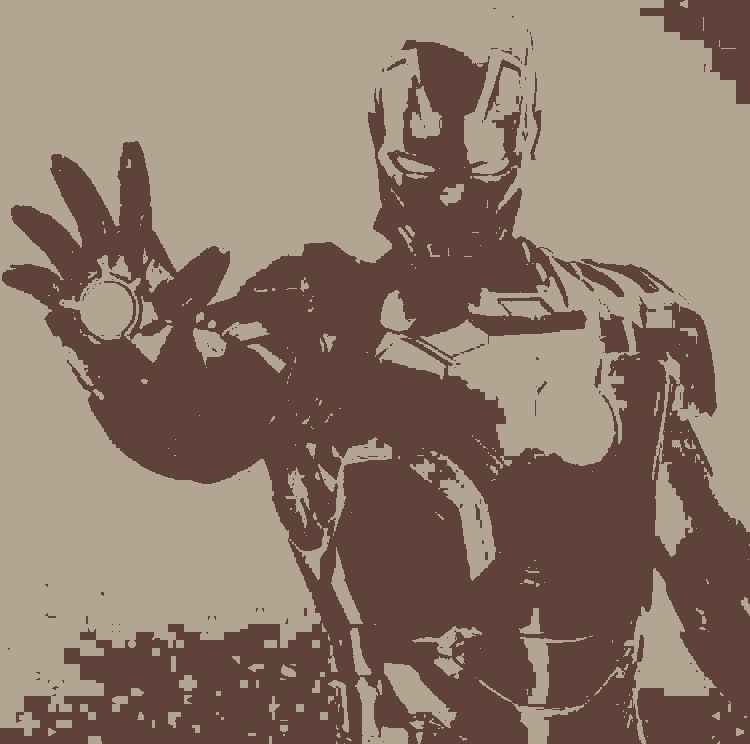

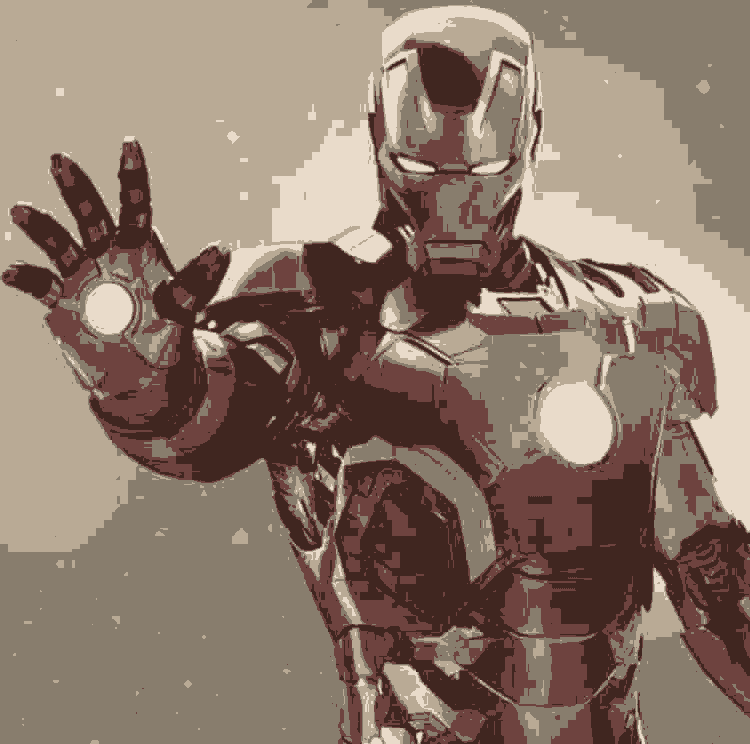

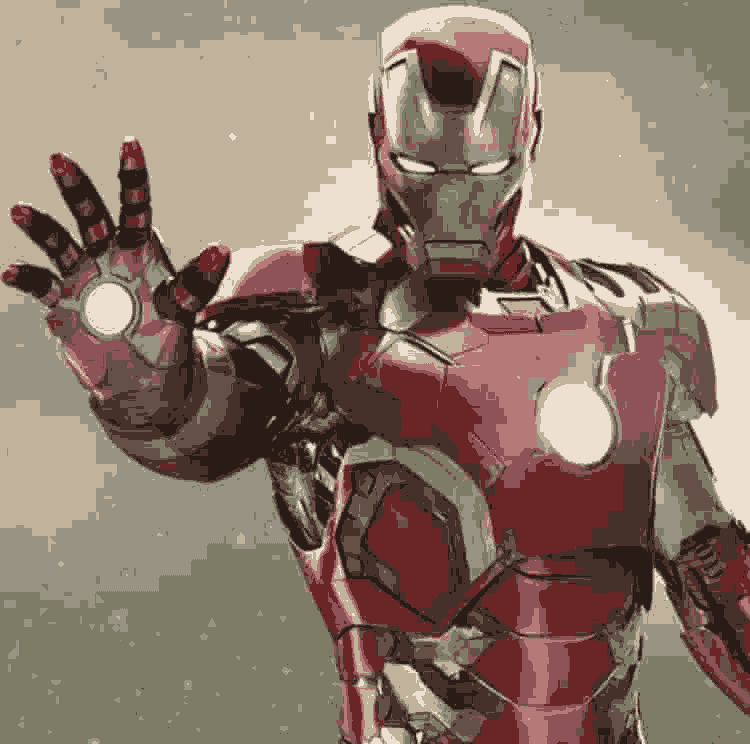

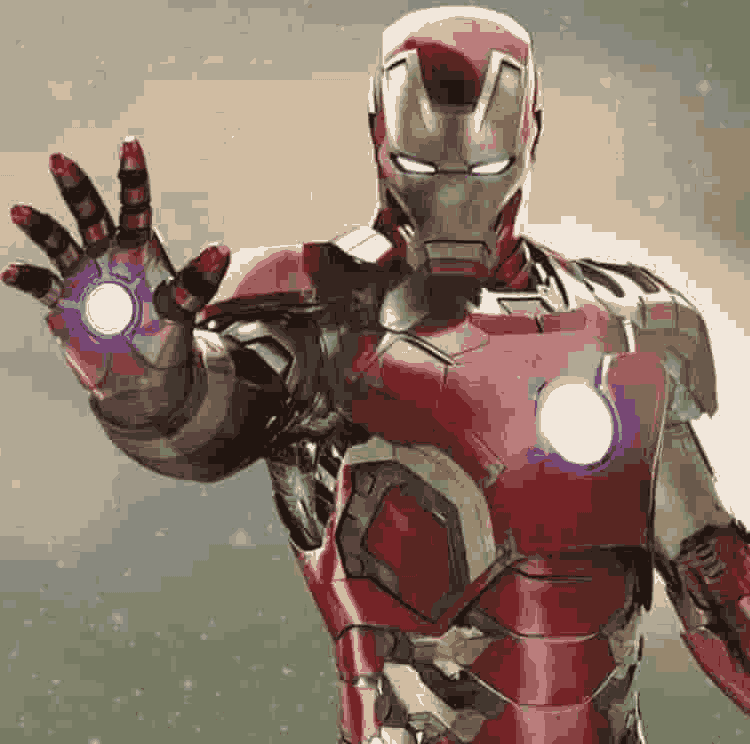

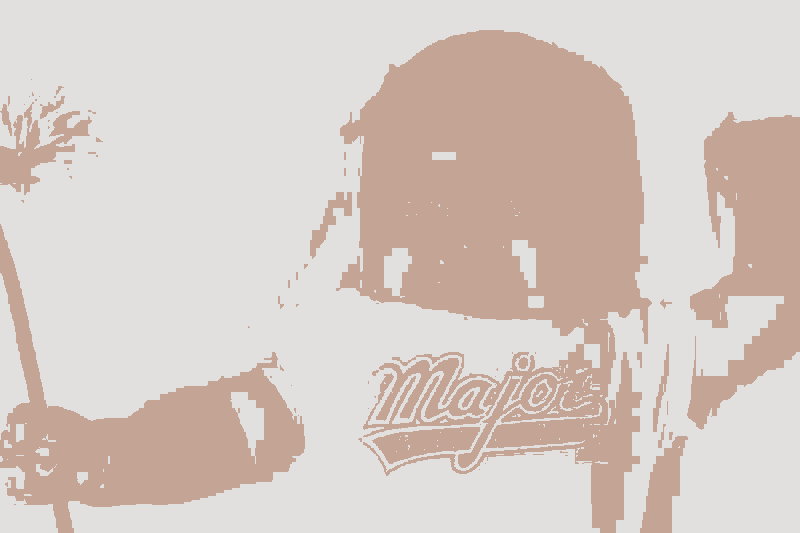

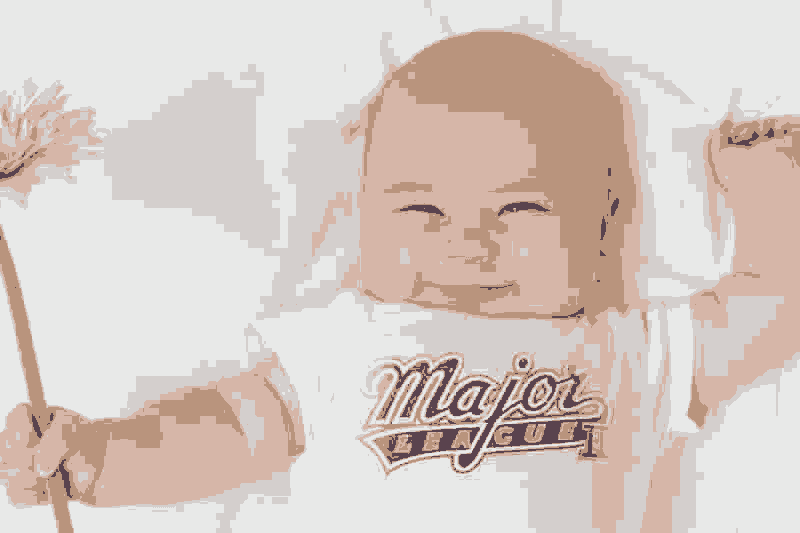

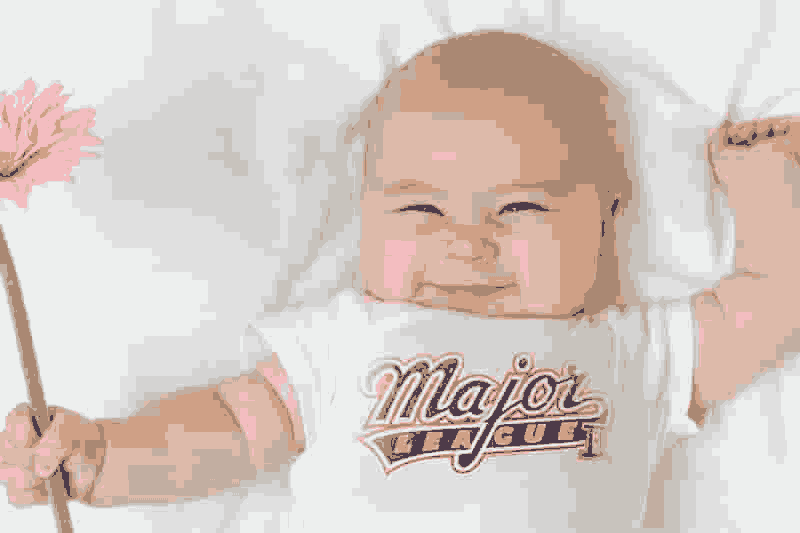

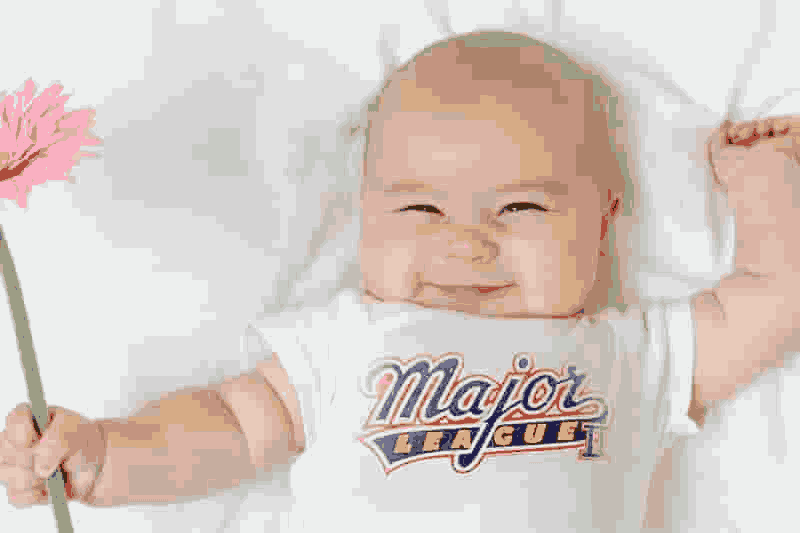

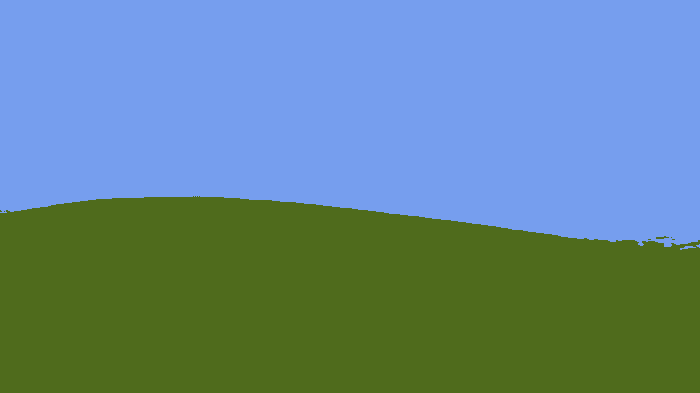

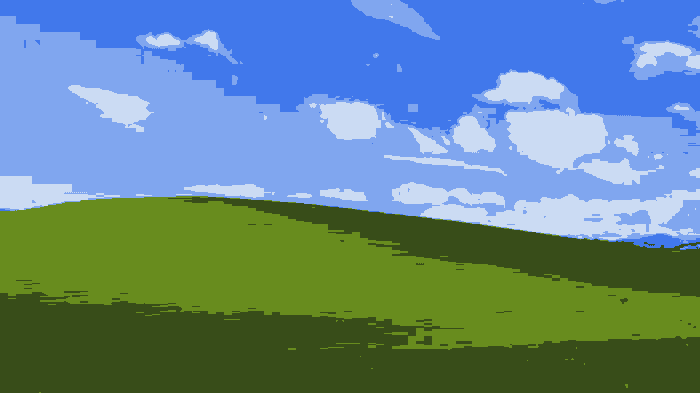

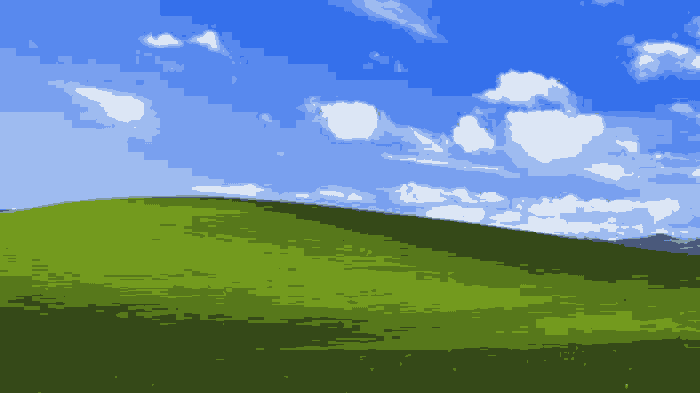

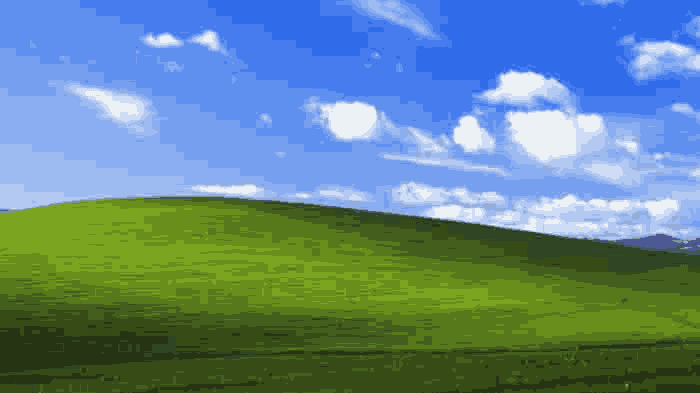

In [53]:
k_values = [2, 5, 10,20]
images = [input_img_1_2d, input_img_2_2d, input_img_3_2d]
org_images = [input_img_1, input_img_2, input_img_3]

for i, (image, org_image) in enumerate(zip(images, org_images)):
    for k in k_values:
        labels, centroids = kmeans_clustering(image, k)
        # Replace pixel values with centroid values
        new_image_data = centroids[labels].reshape(org_image.shape)
        # Convert the data back to image format
        new_image = Image.fromarray(new_image_data.astype(np.uint8))
        # Display the new image
        display(HTML(f'<h2>Clustered Image of input {i+1} (k={k})</h2>'))
        display(new_image)


### Expected Output


![Example Image](1.O.jpg)
![Example Image](2.O.jpg)
![Example Image](3.O.jpg)
